In [37]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from geodatasets import get_path
from folium.plugins import MarkerCluster
import folium

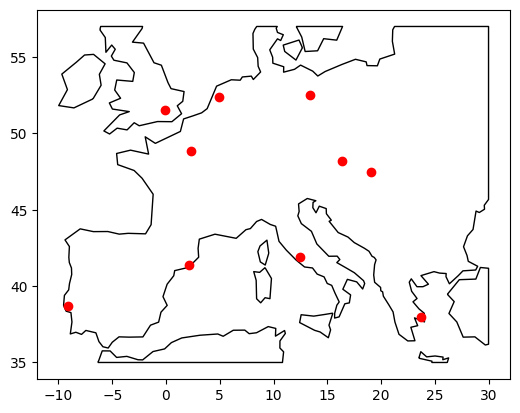

In [38]:
df = pd.DataFrame(
    {
        "City": ["Amsterdam", "Athens", "Barcelona", "Berlin", "Budapest", "Lisbon", "London", "Paris", "Rome", "Vienna"],
        "Country": ["Netherlands", "Greece", "Spain", "Germany", "Hungary", "Portugal", "England", "France", "Italy", "Austria"],
        "Latitude": [52.3727, 37.9841, 41.3827, 52.52, 47.4925, 38.7252, 51.5072, 48.8566, 41.8933, 48.2083],
        "Longitude": [4.8957, 23.7280, 2.1769, 13.405, 19.0513, -9.15, -0.1275, 2.3522, 12.4827, 16.3725],
    }
)

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

world = geopandas.read_file(get_path("naturalearth.land"))

ax = world.clip([-12, 35, 30, 57]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red")

plt.show()

In [39]:
lats = np.array([52.3727, 37.9841, 41.3827, 52.52, 47.4925, 38.7252, 51.5072, 48.8566, 41.8933, 48.2083])
lons = np.array([4.8957, 23.7280, 2.1769, 13.405, 19.0513, -9.15, -0.1275, 2.3522, 12.4827, 16.3725])
cities = np.array(["Amsterdam", "Athens", "Barcelona", "Berlin", "Budapest", "Lisbon", "London", "Paris", "Rome", "Vienna"])

location = list(zip(lats,lons))
popups = ["{}".format(cities) for (cities) in cities] 
popups

m1 = folium.Map(
    location=[48.1375, 11.575],
    tiles='openstreetmap', 
    zoom_start=5
)

marker_cluster = MarkerCluster(
    locations=location,
    popups=popups,
    name="1000 clustered icons",
    overlay=True,
    control=True 
)

folium.CircleMarker(
    location=[51.2088, 3.2241],
    radius=80,
    popup="Исследуемая область",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m1)  

marker_cluster.add_to(m1)

folium.LayerControl().add_to(m1)

m1